# SPARC-4 Pipeline Tools
## Night of  ``2023-06-05`` - ``PHOTOMETRY``
***

This notebook shows an example of the full reduction of the SPARC4 data  in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link) using the SPARC4 pipeline tools. 

* Author: Eder Martioli, LNA 18 Apr 2024

In [1]:
import os, sys
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
import sparc4.utils as s4utils
import glob
import warnings
warnings.filterwarnings('ignore')

## User inputs and initial setup

Before starting the reduction, we must configure a few parameters. The pipeline comes with default values for all parameters. To modify these, one can create and edit their own parameter file, then load it into the ``PARAMS_FILE`` variable. Alternatively, parameters can be changed by directly resetting the dictionary entry for a specific parameter, like this: ``p['PARAM_NAME'] = PARAM_NEW_VALUE``. See examples below.

In [2]:
# set night directory name
NIGHTDIR = '20230605'
# set raw data root directory
ROOTDATADIR =  "/Users/eder/Data/SPARC4/minidata/"
# set reduced data root directory
ROOTREDUCEDDIR = "/Users/eder/Data/SPARC4/minidata/reduced/"
# set reduced data root directory
PIPELINEDIR = "/Users/eder/sparc4-pipeline/"
# define path to default calibration directory
calibdb_dir = os.path.join(PIPELINEDIR, "calibdb/")

# set path to the parameters file:
#PARAMS_FILE = ""  # to use deafult values
PARAMS_FILE = "{}/user_files/my_params.yaml".format(PIPELINEDIR)

# set path to a target list file
# this is to force targets to be included in the source catalog in addition to those detected automatically
TARGET_LIST_FILE = os.path.join(PIPELINEDIR,"user_files/targets.csv")

# select a SPARC4 channel: 1 (g), 2 (r), 3 (i) or 4 (z)
CHANNEL = 2

# initialize pipeline parameters
p = s4pipelib.init_s4_p(NIGHTDIR,
                        ROOTDATADIR,
                        ROOTREDUCEDDIR,
                        print_report=False,
                        param_file=PARAMS_FILE)

# get data dir
datadir = p['data_directories'][CHANNEL-1]
# get reduce dir
reducedir = p['reduce_directories'][CHANNEL-1]

# to force reduction even if products already exist
FORCE = False

###############################################################
# Below are a few examples on how to manually reset parameters: 
###############################################################

# set astrometry reference image as the one for this channel
p["ASTROM_REF_IMG"] = os.path.join(calibdb_dir, p["ASTROM_REF_IMGS"][CHANNEL-1])

# to build stacks of 10 images instead of the default value of 16 images
p['NFILES_FOR_STACK'] = 10

# to change the S/N threshold for detecting sources
# -- note that lower values will result in more (fainter) sources being detected.
p['PHOT_THRESHOLD'] = 30

# uncomment below to print all parameters and their respective values:
#for key in p.keys():
#    print("p['{}']={}".format(key,p[key]))

***
# <font color='darkblue'>Bias and Flat-field calibrations</font> 

In this section we build the master bias and flat-field calibrations.

## Define input list and output product file names

In [3]:
# create a list of zeros for current detector mode
zero_list = glob.glob("{}/{}".format(datadir,"*zero*.fits"))

# define file name of master bias 
p["master_bias"] = "{}/{}_s4c{}_MasterZero.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# create a list of flats for current detector mode
flat_list = glob.glob("{}/{}".format(datadir,"*dflat*.fits"))

# define file name of master flat
p["master_flat"] = "{}/{}_s4c{}_MasterDomeFlat.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# Run master calibration

The master calibration routine combines a list of calibration files into a master calibration image.

In [4]:
# calculate master bias and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=zero_list, 
                                     output=p["master_bias"], 
                                     obstype='bias', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     force=FORCE)

2024-09-20 10:56:06,304 root - INFO - bias files: 3  [pipeline_lib]


2024-09-20 10:56:06,304 | INFO | bias files: 3


2024-09-20 10:56:06,359 root - INFO - gain:3.3 electron / adu  [pipeline_lib]


2024-09-20 10:56:06,359 | INFO | gain:3.3 electron / adu


2024-09-20 10:56:06,360 root - INFO - processing frame 1 of 3  [pipeline_lib]


2024-09-20 10:56:06,360 | INFO | processing frame 1 of 3


2024-09-20 10:56:06,470 root - INFO - processing frame 2 of 3  [pipeline_lib]


2024-09-20 10:56:06,470 | INFO | processing frame 2 of 3


2024-09-20 10:56:06,569 root - INFO - processing frame 3 of 3  [pipeline_lib]


2024-09-20 10:56:06,569 | INFO | processing frame 3 of 3


2024-09-20 10:56:06,681 astropop - INFO - Combining 3 images with median method.  [imcombine]


2024-09-20 10:56:06,681 | INFO | Combining 3 images with median method.


2024-09-20 10:56:06,761 root - INFO - Normalization mean value:1650.6460764884941 electron  [pipeline_lib]


2024-09-20 10:56:06,761 | INFO | Normalization mean value:1650.6460764884941 electron


In [5]:
# calculate master dome flat and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=flat_list, 
                                     output=p["master_flat"], 
                                     obstype='flat', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     normalize=True, 
                                     force=FORCE)

2024-09-20 10:56:10,202 root - INFO - flat files: 3  [pipeline_lib]


2024-09-20 10:56:10,202 | INFO | flat files: 3


2024-09-20 10:56:10,257 root - INFO - gain:3.3 electron / adu  [pipeline_lib]


2024-09-20 10:56:10,257 | INFO | gain:3.3 electron / adu


2024-09-20 10:56:10,257 root - INFO - processing frame 1 of 3  [pipeline_lib]


2024-09-20 10:56:10,257 | INFO | processing frame 1 of 3


2024-09-20 10:56:10,361 root - INFO - processing frame 2 of 3  [pipeline_lib]


2024-09-20 10:56:10,361 | INFO | processing frame 2 of 3


2024-09-20 10:56:10,457 root - INFO - processing frame 3 of 3  [pipeline_lib]


2024-09-20 10:56:10,457 | INFO | processing frame 3 of 3


2024-09-20 10:56:10,565 astropop - INFO - Combining 3 images with median method.  [imcombine]


2024-09-20 10:56:10,565 | INFO | Combining 3 images with median method.


2024-09-20 10:56:10,629 root - INFO - Normalization mean value:55943.00104351044 electron  [pipeline_lib]


2024-09-20 10:56:10,629 | INFO | Normalization mean value:55943.00104351044 electron


# Plot master calibration results

Now, we plot the results to check if they look fine. 

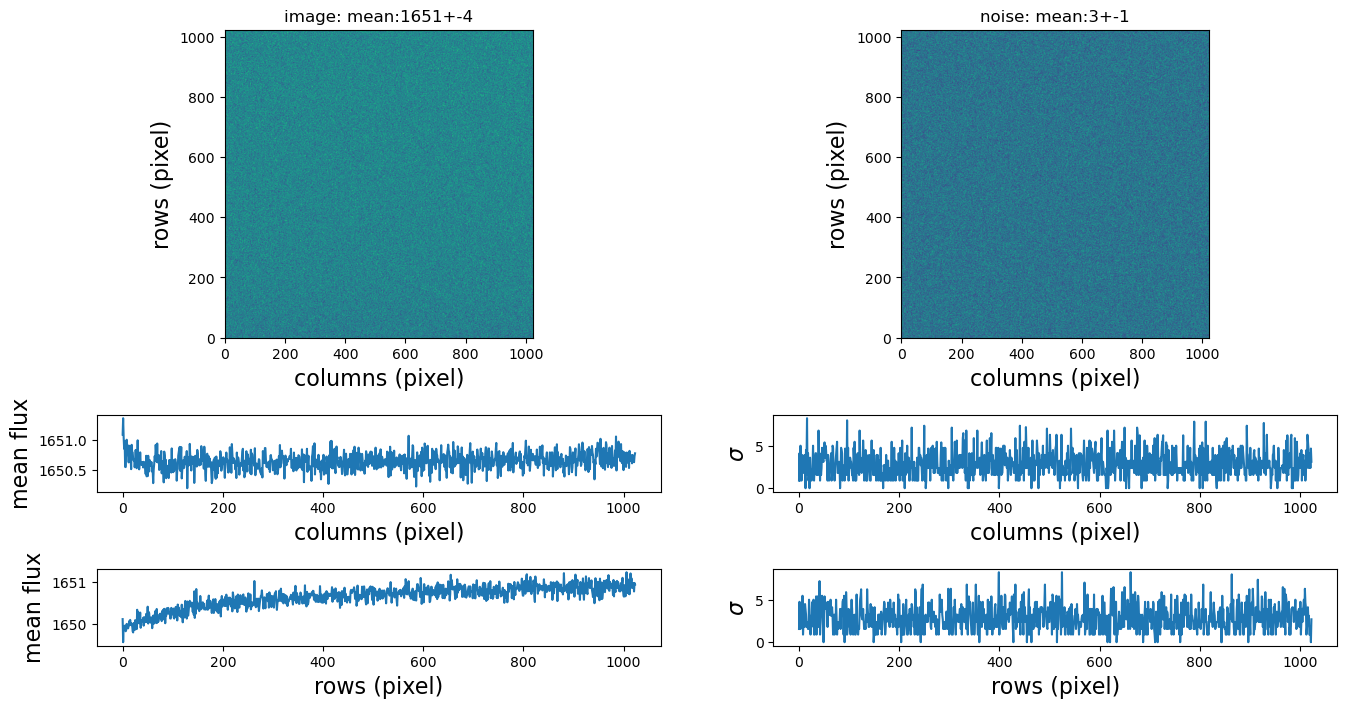

In [6]:
# plot master bias
s4plt.plot_cal_frame(p["master_bias"], 
                     percentile=99.5, 
                     combine_rows=True, 
                     combine_cols=True)

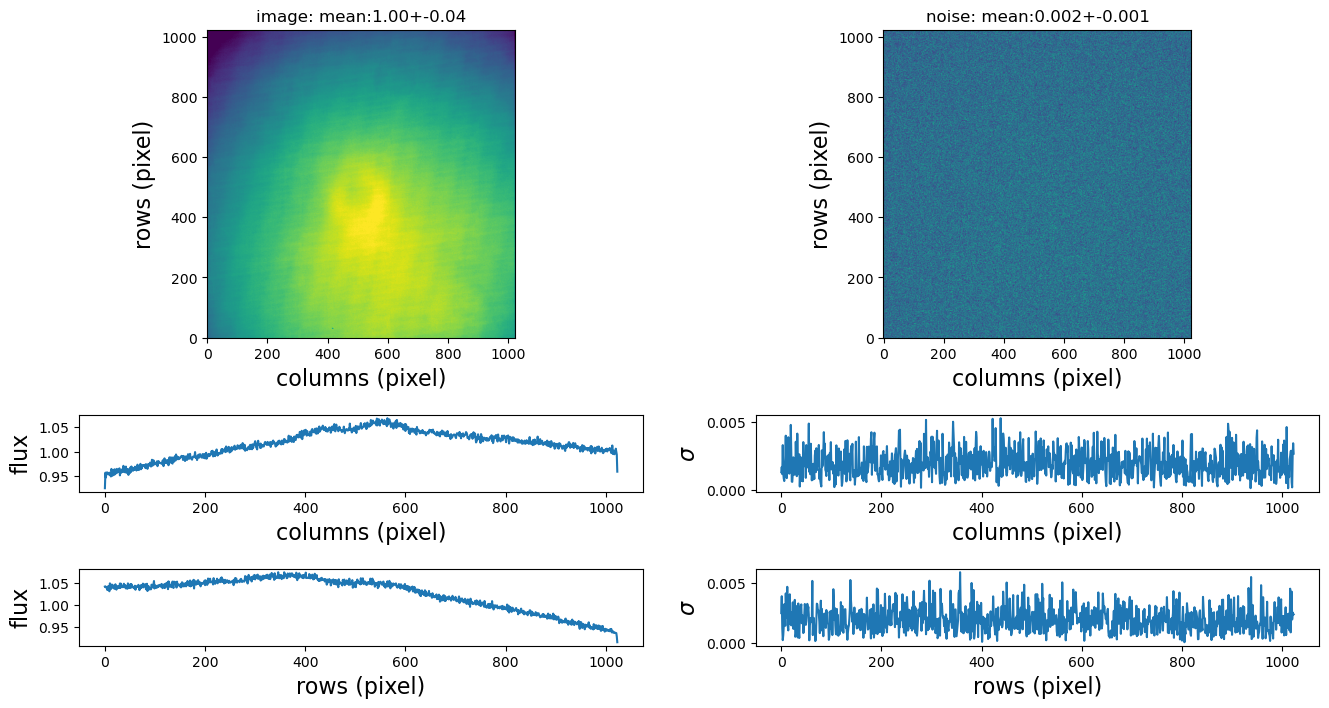

In [7]:
# plot master flat
s4plt.plot_cal_frame(p["master_flat"], 
                     percentile=99.5, 
                     xcut=512, 
                     ycut=512)

***
# <font color='darkblue'>Science image reduction - Photometry </font> 

In this section we reduce the science data. In this example we show the reductiion processes for the following observations:

* The astrometric calibration field [CR3](https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=14%3A38%3A08+-42%3A35%3A14&submit=SIMBAD+search) observed in photometric mode. 

### Select C3 data

In [8]:
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "CR3"  # LTT 4816 is a spectro-photometric standard

# set suffix for output stack filename
stack_suffix = "{}_s4c{}_{}".format(NIGHTDIR, 
                                    CHANNEL, 
                                    OBJECTID.replace(" ",""))
# create a list of science data 
sci_list = glob.glob("{}/{}".format(datadir,"*cr3.fits"))

### Reduce scientific exposures in `PHOTOMETRIC` mode

To reduce scientific frames, run the routine ``s4pipelib.stack_and_reduce_sci_images``. This routine performs calibration for detector gain, bias, and flat-field. Then, a subset of frames is stacked to generate a stack product. Source detection is then conducted within the stack frame, and the identified sources are cross-referenced with a catalog to establish an astrometric solution and generate a master catalog for all input observations of this field. Aperture photometry is computed for several aperture sizes across all sources and for all input image frames. Finally, the resulting calibrated images and their associated photometric catalogs are saved into ``proc.fits`` product FITS files.

2024-09-20 10:56:23,422 root - INFO - STACK: checking image 1 of 10: i=0 20230605_s4c2_001083_cr3.fits -> NSOURCES: 41  bkg: 580.805457761287 meanflux: 471739.6188364677   [pipeline_lib]


2024-09-20 10:56:23,422 | INFO | STACK: checking image 1 of 10: i=0 20230605_s4c2_001083_cr3.fits -> NSOURCES: 41  bkg: 580.805457761287 meanflux: 471739.6188364677 


2024-09-20 10:56:23,960 root - INFO - STACK: checking image 2 of 10: i=1 20230605_s4c2_001082_cr3.fits -> NSOURCES: 50  bkg: 580.8785193770444 meanflux: 476301.9120163731   [pipeline_lib]


2024-09-20 10:56:23,960 | INFO | STACK: checking image 2 of 10: i=1 20230605_s4c2_001082_cr3.fits -> NSOURCES: 50  bkg: 580.8785193770444 meanflux: 476301.9120163731 


2024-09-20 10:56:24,478 root - INFO - STACK: checking image 3 of 10: i=2 20230605_s4c2_001076_cr3.fits -> NSOURCES: 48  bkg: 582.7194396824 meanflux: 473459.7286988952   [pipeline_lib]


2024-09-20 10:56:24,478 | INFO | STACK: checking image 3 of 10: i=2 20230605_s4c2_001076_cr3.fits -> NSOURCES: 48  bkg: 582.7194396824 meanflux: 473459.7286988952 


2024-09-20 10:56:25,237 root - INFO - STACK: checking image 4 of 10: i=3 20230605_s4c2_001077_cr3.fits -> NSOURCES: 39  bkg: 581.596312022846 meanflux: 479024.9268670275   [pipeline_lib]


2024-09-20 10:56:25,237 | INFO | STACK: checking image 4 of 10: i=3 20230605_s4c2_001077_cr3.fits -> NSOURCES: 39  bkg: 581.596312022846 meanflux: 479024.9268670275 


2024-09-20 10:56:25,812 root - INFO - STACK: checking image 5 of 10: i=4 20230605_s4c2_001080_cr3.fits -> NSOURCES: 47  bkg: 581.201732867643 meanflux: 481329.8172827657   [pipeline_lib]


2024-09-20 10:56:25,812 | INFO | STACK: checking image 5 of 10: i=4 20230605_s4c2_001080_cr3.fits -> NSOURCES: 47  bkg: 581.201732867643 meanflux: 481329.8172827657 


2024-09-20 10:56:26,365 root - INFO - STACK: checking image 6 of 10: i=5 20230605_s4c2_001081_cr3.fits -> NSOURCES: 49  bkg: 581.1063111995904 meanflux: 472337.7716671072   [pipeline_lib]


2024-09-20 10:56:26,365 | INFO | STACK: checking image 6 of 10: i=5 20230605_s4c2_001081_cr3.fits -> NSOURCES: 49  bkg: 581.1063111995904 meanflux: 472337.7716671072 


2024-09-20 10:56:27,118 root - INFO - STACK: checking image 7 of 10: i=6 20230605_s4c2_001078_cr3.fits -> NSOURCES: 40  bkg: 582.4548990470307 meanflux: 486198.64307507675   [pipeline_lib]


2024-09-20 10:56:27,118 | INFO | STACK: checking image 7 of 10: i=6 20230605_s4c2_001078_cr3.fits -> NSOURCES: 40  bkg: 582.4548990470307 meanflux: 486198.64307507675 


2024-09-20 10:56:27,717 root - INFO - STACK: checking image 8 of 10: i=7 20230605_s4c2_001079_cr3.fits -> NSOURCES: 47  bkg: 581.1673903825965 meanflux: 480122.86187515705   [pipeline_lib]


2024-09-20 10:56:27,717 | INFO | STACK: checking image 8 of 10: i=7 20230605_s4c2_001079_cr3.fits -> NSOURCES: 47  bkg: 581.1673903825965 meanflux: 480122.86187515705 


2024-09-20 10:56:28,286 root - INFO - STACK: checking image 9 of 10: i=8 20230605_s4c2_001075_cr3.fits -> NSOURCES: 47  bkg: 581.7832822401757 meanflux: 478920.52729427285   [pipeline_lib]


2024-09-20 10:56:28,286 | INFO | STACK: checking image 9 of 10: i=8 20230605_s4c2_001075_cr3.fits -> NSOURCES: 47  bkg: 581.7832822401757 meanflux: 478920.52729427285 


2024-09-20 10:56:28,804 root - INFO - STACK: checking image 10 of 10: i=9 20230605_s4c2_001074_cr3.fits -> NSOURCES: 44  bkg: 581.7716786155172 meanflux: 474430.4768420576   [pipeline_lib]


2024-09-20 10:56:28,804 | INFO | STACK: checking image 10 of 10: i=9 20230605_s4c2_001074_cr3.fits -> NSOURCES: 44  bkg: 581.7716786155172 meanflux: 474430.4768420576 


2024-09-20 10:56:28,807 root - INFO - Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits  [pipeline_lib]


2024-09-20 10:56:28,807 | INFO | Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits


2024-09-20 10:56:28,828 root - INFO - OBJECT files: 10  [pipeline_lib]


2024-09-20 10:56:28,828 | INFO | OBJECT files: 10


2024-09-20 10:56:28,829 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-09-20 10:56:28,829 | INFO | Loading science frames to memory ... 


2024-09-20 10:56:28,937 root - INFO - gain:3.3 electron / adu  [pipeline_lib]


2024-09-20 10:56:28,937 | INFO | gain:3.3 electron / adu


2024-09-20 10:56:28,937 root - INFO - Calibrating science frames (CR, gain, bias, flat) for stack ...   [pipeline_lib]


2024-09-20 10:56:28,937 | INFO | Calibrating science frames (CR, gain, bias, flat) for stack ... 


2024-09-20 10:56:28,938 root - INFO - Calibrating science frame 1 of 10 : 20230605_s4c2_001083_cr3.fits   [pipeline_lib]


2024-09-20 10:56:28,938 | INFO | Calibrating science frame 1 of 10 : 20230605_s4c2_001083_cr3.fits 


2024-09-20 10:56:29,311 root - INFO - Calibrating science frame 2 of 10 : 20230605_s4c2_001074_cr3.fits   [pipeline_lib]


2024-09-20 10:56:29,311 | INFO | Calibrating science frame 2 of 10 : 20230605_s4c2_001074_cr3.fits 


2024-09-20 10:56:29,683 root - INFO - Calibrating science frame 3 of 10 : 20230605_s4c2_001076_cr3.fits   [pipeline_lib]


2024-09-20 10:56:29,683 | INFO | Calibrating science frame 3 of 10 : 20230605_s4c2_001076_cr3.fits 


2024-09-20 10:56:30,064 root - INFO - Calibrating science frame 4 of 10 : 20230605_s4c2_001077_cr3.fits   [pipeline_lib]


2024-09-20 10:56:30,064 | INFO | Calibrating science frame 4 of 10 : 20230605_s4c2_001077_cr3.fits 


2024-09-20 10:56:30,441 root - INFO - Calibrating science frame 5 of 10 : 20230605_s4c2_001080_cr3.fits   [pipeline_lib]


2024-09-20 10:56:30,441 | INFO | Calibrating science frame 5 of 10 : 20230605_s4c2_001080_cr3.fits 


2024-09-20 10:56:30,810 root - INFO - Calibrating science frame 6 of 10 : 20230605_s4c2_001075_cr3.fits   [pipeline_lib]


2024-09-20 10:56:30,810 | INFO | Calibrating science frame 6 of 10 : 20230605_s4c2_001075_cr3.fits 


2024-09-20 10:56:31,181 root - INFO - Calibrating science frame 7 of 10 : 20230605_s4c2_001082_cr3.fits   [pipeline_lib]


2024-09-20 10:56:31,181 | INFO | Calibrating science frame 7 of 10 : 20230605_s4c2_001082_cr3.fits 


2024-09-20 10:56:31,551 root - INFO - Calibrating science frame 8 of 10 : 20230605_s4c2_001078_cr3.fits   [pipeline_lib]


2024-09-20 10:56:31,551 | INFO | Calibrating science frame 8 of 10 : 20230605_s4c2_001078_cr3.fits 


2024-09-20 10:56:31,920 root - INFO - Calibrating science frame 9 of 10 : 20230605_s4c2_001079_cr3.fits   [pipeline_lib]


2024-09-20 10:56:31,920 | INFO | Calibrating science frame 9 of 10 : 20230605_s4c2_001079_cr3.fits 


2024-09-20 10:56:32,284 root - INFO - Calibrating science frame 10 of 10 : 20230605_s4c2_001081_cr3.fits   [pipeline_lib]


2024-09-20 10:56:32,284 | INFO | Calibrating science frame 10 of 10 : 20230605_s4c2_001081_cr3.fits 


2024-09-20 10:56:32,651 root - INFO - Registering science frames and stacking them ...   [pipeline_lib]


2024-09-20 10:56:32,651 | INFO | Registering science frames and stacking them ... 


2024-09-20 10:56:32,652 root - INFO - Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,652 | INFO | Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001083_cr3.fits


2024-09-20 10:56:32,654 root - INFO - Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001074_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,654 | INFO | Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001074_cr3.fits


2024-09-20 10:56:32,655 root - INFO - Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001076_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,655 | INFO | Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001076_cr3.fits


2024-09-20 10:56:32,658 root - INFO - Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001077_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,658 | INFO | Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001077_cr3.fits


2024-09-20 10:56:32,659 root - INFO - Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001080_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,659 | INFO | Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001080_cr3.fits


2024-09-20 10:56:32,662 root - INFO - Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001075_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,662 | INFO | Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001075_cr3.fits


2024-09-20 10:56:32,663 root - INFO - Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001082_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,663 | INFO | Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001082_cr3.fits


2024-09-20 10:56:32,665 root - INFO - Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001078_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,665 | INFO | Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001078_cr3.fits


2024-09-20 10:56:32,667 root - INFO - Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001079_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,667 | INFO | Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001079_cr3.fits


2024-09-20 10:56:32,669 root - INFO - Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001081_cr3.fits  [pipeline_lib]


2024-09-20 10:56:32,669 | INFO | Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs2/20230605/20230605_s4c2_001081_cr3.fits


2024-09-20 10:56:32,674 astropop - INFO - Registering image 1 from 10  [register]


2024-09-20 10:56:32,674 | INFO | Registering image 1 from 10


2024-09-20 10:56:32,676 astropop - INFO - Images are equal, skipping registering.  [register]


2024-09-20 10:56:32,676 | INFO | Images are equal, skipping registering.


2024-09-20 10:56:32,770 astropop - INFO - Registering image 2 from 10  [register]


2024-09-20 10:56:32,770 | INFO | Registering image 2 from 10


2024-09-20 10:56:32,874 astropop - INFO - Filling registered image with cval=268.62  [register]


2024-09-20 10:56:32,874 | INFO | Filling registered image with cval=268.62


2024-09-20 10:56:32,885 astropop - INFO - Registering image with: translation=[-0.   1.5], rotation=0.00°  [register]


2024-09-20 10:56:32,885 | INFO | Registering image with: translation=[-0.   1.5], rotation=0.00°


2024-09-20 10:56:33,027 astropop - INFO - Registering image 3 from 10  [register]


2024-09-20 10:56:33,027 | INFO | Registering image 3 from 10


2024-09-20 10:56:33,127 astropop - INFO - Filling registered image with cval=271.36  [register]


2024-09-20 10:56:33,127 | INFO | Filling registered image with cval=271.36


2024-09-20 10:56:33,134 astropop - INFO - Registering image with: translation=[-0.25  1.75], rotation=0.00°  [register]


2024-09-20 10:56:33,134 | INFO | Registering image with: translation=[-0.25  1.75], rotation=0.00°


2024-09-20 10:56:33,277 astropop - INFO - Registering image 4 from 10  [register]


2024-09-20 10:56:33,277 | INFO | Registering image 4 from 10


2024-09-20 10:56:33,369 astropop - INFO - Filling registered image with cval=267.98  [register]


2024-09-20 10:56:33,369 | INFO | Filling registered image with cval=267.98


2024-09-20 10:56:33,371 astropop - INFO - Registering image with: translation=[-0.   1.5], rotation=0.00°  [register]


2024-09-20 10:56:33,371 | INFO | Registering image with: translation=[-0.   1.5], rotation=0.00°


2024-09-20 10:56:33,515 astropop - INFO - Registering image 5 from 10  [register]


2024-09-20 10:56:33,515 | INFO | Registering image 5 from 10


2024-09-20 10:56:33,605 astropop - INFO - Filling registered image with cval=266.32  [register]


2024-09-20 10:56:33,605 | INFO | Filling registered image with cval=266.32


2024-09-20 10:56:33,610 astropop - INFO - Registering image with: translation=[-0.25 -0.  ], rotation=0.00°  [register]


2024-09-20 10:56:33,610 | INFO | Registering image with: translation=[-0.25 -0.  ], rotation=0.00°


2024-09-20 10:56:33,753 astropop - INFO - Registering image 6 from 10  [register]


2024-09-20 10:56:33,753 | INFO | Registering image 6 from 10


2024-09-20 10:56:33,841 astropop - INFO - Filling registered image with cval=268.21  [register]


2024-09-20 10:56:33,841 | INFO | Filling registered image with cval=268.21


2024-09-20 10:56:33,852 astropop - INFO - Registering image with: translation=[-0.5  2. ], rotation=0.00°  [register]


2024-09-20 10:56:33,852 | INFO | Registering image with: translation=[-0.5  2. ], rotation=0.00°


2024-09-20 10:56:33,996 astropop - INFO - Registering image 7 from 10  [register]


2024-09-20 10:56:33,996 | INFO | Registering image 7 from 10


2024-09-20 10:56:34,093 astropop - INFO - Filling registered image with cval=266.06  [register]


2024-09-20 10:56:34,093 | INFO | Filling registered image with cval=266.06


2024-09-20 10:56:34,103 astropop - INFO - Registering image with: translation=[-0.75  0.75], rotation=0.00°  [register]


2024-09-20 10:56:34,103 | INFO | Registering image with: translation=[-0.75  0.75], rotation=0.00°


2024-09-20 10:56:34,256 astropop - INFO - Registering image 8 from 10  [register]


2024-09-20 10:56:34,256 | INFO | Registering image 8 from 10


2024-09-20 10:56:34,362 astropop - INFO - Filling registered image with cval=270.72  [register]


2024-09-20 10:56:34,362 | INFO | Filling registered image with cval=270.72


2024-09-20 10:56:34,370 astropop - INFO - Registering image with: translation=[-0.5   0.75], rotation=0.00°  [register]


2024-09-20 10:56:34,370 | INFO | Registering image with: translation=[-0.5   0.75], rotation=0.00°


2024-09-20 10:56:34,509 astropop - INFO - Registering image 9 from 10  [register]


2024-09-20 10:56:34,509 | INFO | Registering image 9 from 10


2024-09-20 10:56:34,596 astropop - INFO - Filling registered image with cval=266.64  [register]


2024-09-20 10:56:34,596 | INFO | Filling registered image with cval=266.64


2024-09-20 10:56:34,601 astropop - INFO - Registering image with: translation=[-1.    0.25], rotation=0.00°  [register]


2024-09-20 10:56:34,601 | INFO | Registering image with: translation=[-1.    0.25], rotation=0.00°


2024-09-20 10:56:34,756 astropop - INFO - Registering image 10 from 10  [register]


2024-09-20 10:56:34,756 | INFO | Registering image 10 from 10


2024-09-20 10:56:34,853 astropop - INFO - Filling registered image with cval=266.19  [register]


2024-09-20 10:56:34,853 | INFO | Filling registered image with cval=266.19


2024-09-20 10:56:34,863 astropop - INFO - Registering image with: translation=[1.25 0.5 ], rotation=0.00°  [register]


2024-09-20 10:56:34,863 | INFO | Registering image with: translation=[1.25 0.5 ], rotation=0.00°


2024-09-20 10:56:35,074 astropop - INFO - Combining 10 images with mean method.  [imcombine]


2024-09-20 10:56:35,074 | INFO | Combining 10 images with mean method.


2024-09-20 10:56:37,222 root - INFO - Creating new catalog of detected sources:  [pipeline_lib]


2024-09-20 10:56:37,222 | INFO | Creating new catalog of detected sources:


2024-09-20 10:56:37,604 root - INFO - Solving astrometry in PHOT-MODE using astrometry_from_existing_wcs()  [pipeline_lib]


2024-09-20 10:56:37,604 | INFO | Solving astrometry in PHOT-MODE using astrometry_from_existing_wcs()


2024-09-20 10:56:37,604 root - INFO - No sky coordinates given, searching sources in online catalogs  [pipeline_lib]


2024-09-20 10:56:37,604 | INFO | No sky coordinates given, searching sources in online catalogs


2024-09-20 10:56:37,605 root - INFO - Querying Gaia DR3 using twirl  [pipeline_lib]


2024-09-20 10:56:37,605 | INFO | Querying Gaia DR3 using twirl


2024-09-20 10:56:38,823 root - INFO - Matching sources with catalog and solving astrometry to compute WCS  [pipeline_lib]


2024-09-20 10:56:38,823 | INFO | Matching sources with catalog and solving astrometry to compute WCS


2024-09-20 10:56:39,629 root - INFO - Running photometry for multiple apertures:  [pipeline_lib]


2024-09-20 10:56:39,629 | INFO | Running photometry for multiple apertures:


2024-09-20 10:56:39,629 root - INFO - Aperture radius of 5 pixels: 1 of 7 :  [pipeline_lib]


2024-09-20 10:56:39,629 | INFO | Aperture radius of 5 pixels: 1 of 7 :


2024-09-20 10:56:39,986 root - INFO - Aperture radius of 8 pixels: 2 of 7 :  [pipeline_lib]


2024-09-20 10:56:39,986 | INFO | Aperture radius of 8 pixels: 2 of 7 :


2024-09-20 10:56:40,335 root - INFO - Aperture radius of 10 pixels: 3 of 7 :  [pipeline_lib]


2024-09-20 10:56:40,335 | INFO | Aperture radius of 10 pixels: 3 of 7 :


2024-09-20 10:56:40,693 root - INFO - Aperture radius of 12 pixels: 4 of 7 :  [pipeline_lib]


2024-09-20 10:56:40,693 | INFO | Aperture radius of 12 pixels: 4 of 7 :


2024-09-20 10:56:41,045 root - INFO - Aperture radius of 15 pixels: 5 of 7 :  [pipeline_lib]


2024-09-20 10:56:41,045 | INFO | Aperture radius of 15 pixels: 5 of 7 :


2024-09-20 10:56:41,411 root - INFO - Aperture radius of 20 pixels: 6 of 7 :  [pipeline_lib]


2024-09-20 10:56:41,411 | INFO | Aperture radius of 20 pixels: 6 of 7 :


2024-09-20 10:56:41,790 root - INFO - Aperture radius of 25 pixels: 7 of 7 :  [pipeline_lib]


2024-09-20 10:56:41,790 | INFO | Aperture radius of 25 pixels: 7 of 7 :


2024-09-20 10:56:42,524 root - INFO - The 10 images will be reduced in 1 loops of 100 images each time  [pipeline_lib]


2024-09-20 10:56:42,524 | INFO | The 10 images will be reduced in 1 loops of 100 images each time


2024-09-20 10:56:42,525 root - INFO - Running loop 0 of 1 -> images in loop: 0 to 10 ...   [pipeline_lib]


2024-09-20 10:56:42,525 | INFO | Running loop 0 of 1 -> images in loop: 0 to 10 ... 


2024-09-20 10:56:42,644 root - INFO - OBJECT files: 11  [pipeline_lib]


2024-09-20 10:56:42,644 | INFO | OBJECT files: 11


2024-09-20 10:56:42,644 root - INFO - Creating output list of processed science frames ...   [pipeline_lib]


2024-09-20 10:56:42,644 | INFO | Creating output list of processed science frames ... 


2024-09-20 10:56:42,645 root - INFO - 1 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001083_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,645 | INFO | 1 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001083_cr3_proc.fits


2024-09-20 10:56:42,645 root - INFO - 2 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001083_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,645 | INFO | 2 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001083_cr3_proc.fits


2024-09-20 10:56:42,646 root - INFO - 3 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001082_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,646 | INFO | 3 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001082_cr3_proc.fits


2024-09-20 10:56:42,646 root - INFO - 4 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001076_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,646 | INFO | 4 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001076_cr3_proc.fits


2024-09-20 10:56:42,647 root - INFO - 5 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001077_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,647 | INFO | 5 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001077_cr3_proc.fits


2024-09-20 10:56:42,647 root - INFO - 6 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001080_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,647 | INFO | 6 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001080_cr3_proc.fits


2024-09-20 10:56:42,648 root - INFO - 7 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001081_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,648 | INFO | 7 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001081_cr3_proc.fits


2024-09-20 10:56:42,648 root - INFO - 8 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001078_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,648 | INFO | 8 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001078_cr3_proc.fits


2024-09-20 10:56:42,649 root - INFO - 9 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001079_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,649 | INFO | 9 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001079_cr3_proc.fits


2024-09-20 10:56:42,649 root - INFO - 10 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001075_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,649 | INFO | 10 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001075_cr3_proc.fits


2024-09-20 10:56:42,650 root - INFO - 11 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001074_cr3_proc.fits  [pipeline_lib]


2024-09-20 10:56:42,650 | INFO | 11 of 11 is reduced? True -> /Users/eder/Data/SPARC4/minidata/reduced//20230605//sparc4acs2/20230605_s4c2_001074_cr3_proc.fits


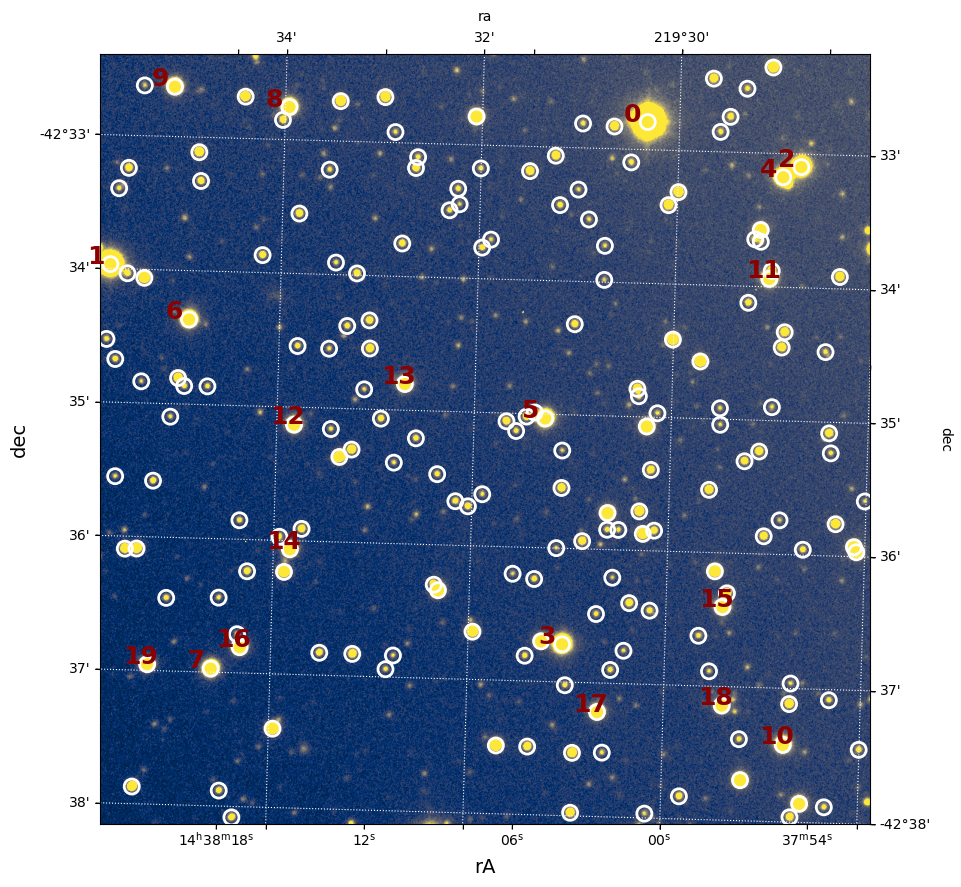

In [9]:
# run stack and reduce individual science images (produce *_proc.fits)
p = s4pipelib.stack_and_reduce_sci_images(p,
                                          sci_list,
                                          reducedir,
                                          stack_suffix=stack_suffix,
                                          force=FORCE,
                                          plot=True) 

### PLOT results

The function ``s4plt.plot_sci_frame`` can be used to plot ``proc.fits`` or ``stack.fits`` products, as in the example below.  

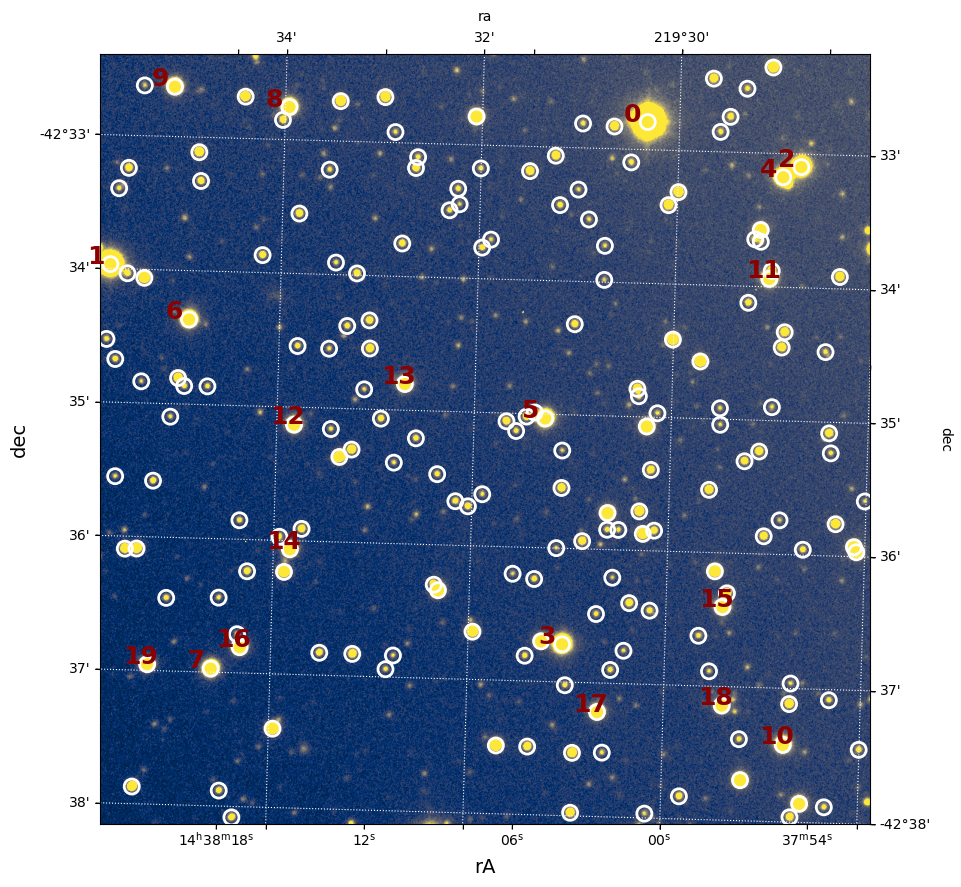

In [10]:
s4plt.plot_sci_frame(p['OBJECT_STACK'], cat_ext=3, nstars=20, use_sky_coords=True)

## Time series of `PHOTOMETRY` data : `light curve`

In this section, we compile all photometric information from the reduced ``proc.fits`` frames into a photometric time series product (`light curve`) using the routine ``s4pipelib.phot_time_series``. For this example, since there are only a few frames, the time series is not particularly interesting, as it contains only a few points in the time series.

In [11]:
ts_suffix = "{}_s4c{}_{}".format(NIGHTDIR, CHANNEL, OBJECTID.replace(" ",""))

list_of_catalogs = s4pipelib.get_list_of_catalogs(p['PHOT_APERTURES_FOR_LIGHTCURVES'])

phot_ts_product = s4pipelib.phot_time_series(p['OBJECT_REDUCED_IMAGES'][1:],
                                             ts_suffix=ts_suffix,
                                             reduce_dir=reducedir,
                                             time_key=p['TIME_KEYWORD_IN_PROC'],
                                             time_format=p['TIME_FORMAT_IN_PROC'],
                                             catalog_names=list_of_catalogs,
                                             time_span_for_rms=p['TIME_SPAN_FOR_RMS'],
                                             force=FORCE)

2024-09-20 10:56:48,283 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP005  [pipeline_lib]


2024-09-20 10:56:48,283 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP005


2024-09-20 10:56:48,387 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP008  [pipeline_lib]


2024-09-20 10:56:48,387 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP008


2024-09-20 10:56:48,450 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP010  [pipeline_lib]


2024-09-20 10:56:48,450 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP010


2024-09-20 10:56:48,514 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP012  [pipeline_lib]


2024-09-20 10:56:48,514 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP012


2024-09-20 10:56:48,581 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP015  [pipeline_lib]


2024-09-20 10:56:48,581 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP015


2024-09-20 10:56:48,652 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP020  [pipeline_lib]


2024-09-20 10:56:48,652 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP020


2024-09-20 10:56:48,724 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP025  [pipeline_lib]


2024-09-20 10:56:48,724 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP025


The function ``s4plt.plot_light_curve`` enables access to the photometric time series product and facilitates the construction of differential photometric light curves. The results are plotted and returned as an Astropy Table, which can also be saved to an output CSV file.

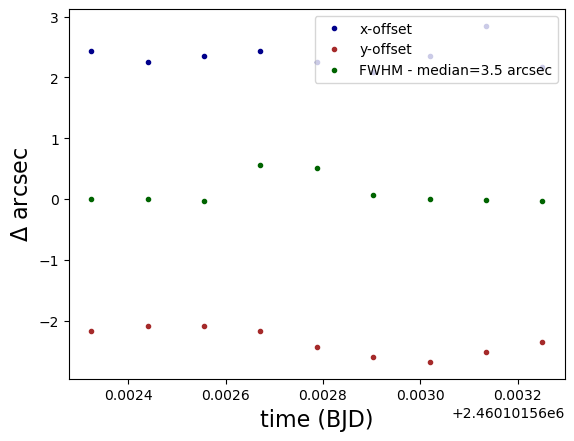

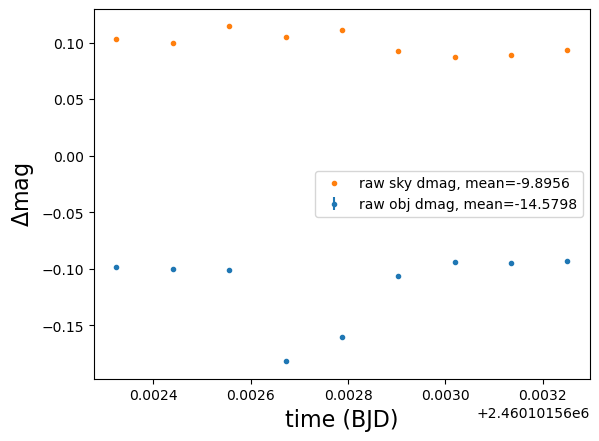

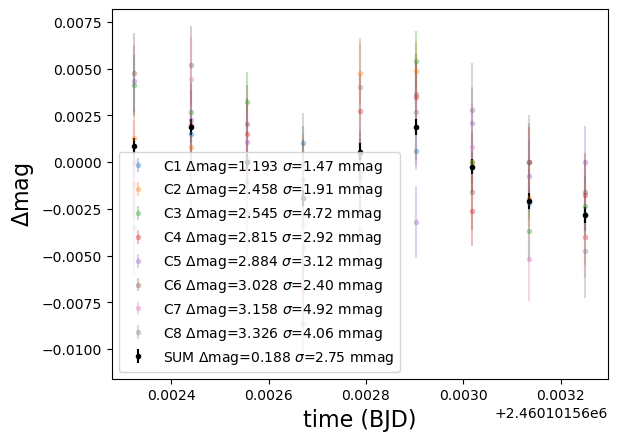

<Table length=9>
       TIME                x         ...       magsum_err             diffmagsum      
     float64            float64      ...        float64                float64        
------------------ ----------------- ... --------------------- -----------------------
 2460101.563250399 727.3320573875217 ...  0.005195882104568236    -0.00282691112728628
 2460101.562555667 727.8320573875217 ...  0.005254553162998563                     0.0
2460101.5626714495 728.0820573875217 ...  0.005501326800006653  -0.0019205845663421428
2460101.5630188216 727.8320573875217 ... 0.0052193161934153826 -0.00023962400880250811
2460101.5631346046 729.3320573875217 ... 0.0052105263044792205  -0.0020927859997357245
 2460101.562787244 727.5820573875217 ...  0.005444813579782249   0.0005587048316311183
 2460101.562903027 727.0820573875217 ... 0.0052746664734775565   0.0018536367592307812
 2460101.562439872 727.5820573875217 ...  0.005242995692398614   0.0018522879093669786
 2460101.562324089 728.0820573875217 ...  0.005231001480181676   0.0008727136646076161

In [12]:
# Select target index
target = 0
# Select comparisons 
comps = [1, 2, 3, 4, 5, 6, 7, 8]

# plot light curve
s4plt.plot_light_curve(phot_ts_product,
                            target=target,
                            comps=comps,
                            nsig=10,
                            plot_coords=True,
                            plot_rawmags=True,
                            plot_sum=True,
                            plot_comps=True,
                            catalog_name=p['PHOT_REF_CATALOG_NAME'])